In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.load_data import load_dataset

In [2]:
df = load_dataset()

#Statistics about the dataset
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.175161e-15  3.384974e-16 -1.379537e-15  2.094852e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.021879e-15  1.494498e-15 -5.620335e-16  1.149614e-16 -2.414189e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [3]:
def checkMissing(df: pd.DataFrame):
    missing = df.isnull().sum()
    if missing.sum() == 0:
        print("\nNo missing values detected.")
    else:
        print("\nMissing values detected:")
        print(missing[missing > 0])

checkMissing(df)


No missing values detected.



Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Class distribution (in %):
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


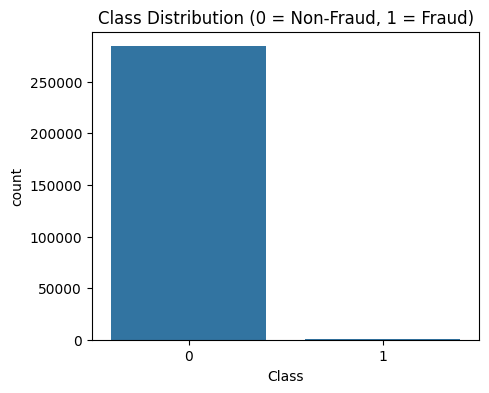

In [4]:
print("\nClass distribution:")
print(df['Class'].value_counts())
print("\nClass distribution (in %):")
print(df['Class'].value_counts(normalize=True) * 100)

plt.figure(figsize=(5, 4))
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.show()

In [5]:
print("\nFraud vs Non-Fraud summary:")
print(df.groupby('Class')['Amount'].describe())


Fraud vs Non-Fraud summary:
          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87


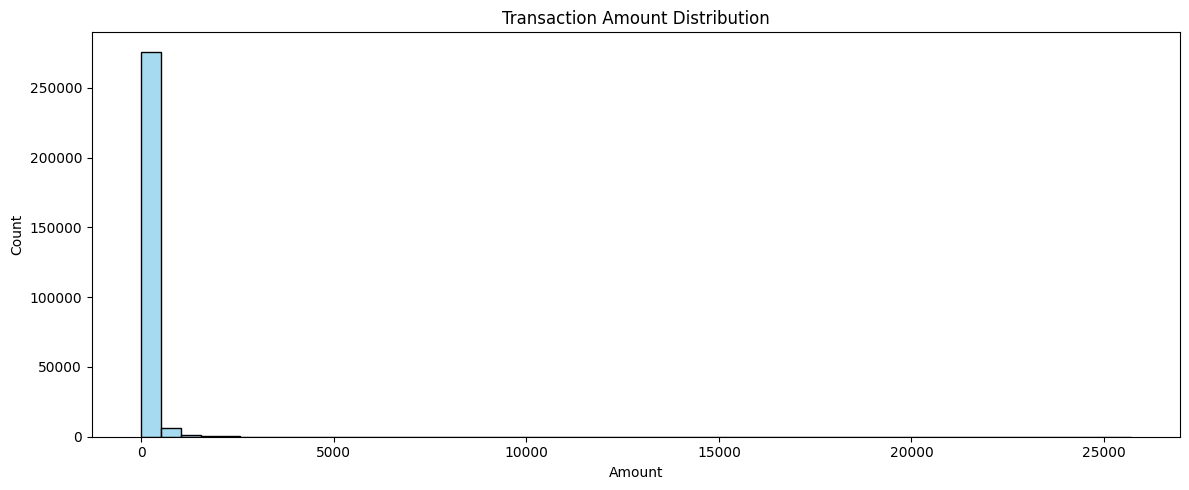

In [6]:
plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
sns.histplot(df['Amount'], bins=50, color='skyblue')
plt.title('Transaction Amount Distribution')

# plt.subplot(1, 2, 2)
# sns.histplot(df['Time'], bins=50, color='salmon')
# plt.title('Transaction Time Distribution')

plt.tight_layout()
plt.show()

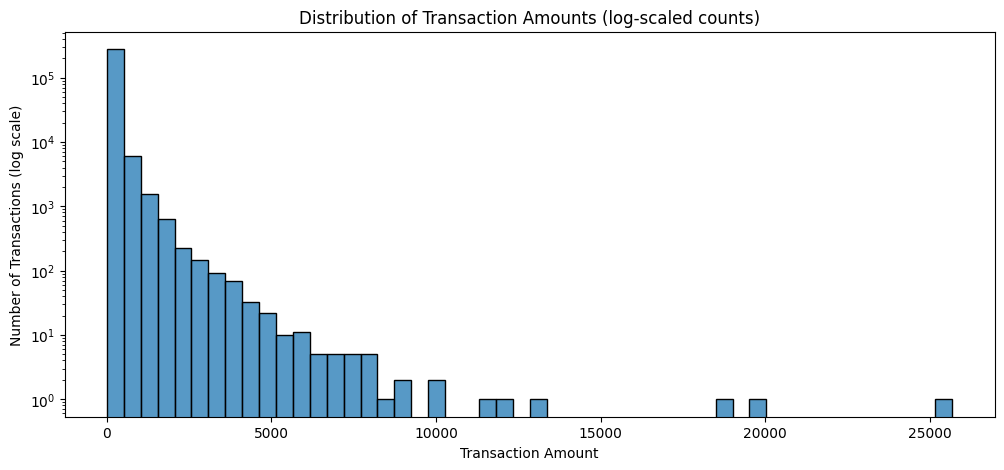

In [7]:
plt.figure(figsize=(12, 5))
sns.histplot(df['Amount'], bins=50, kde=False)
plt.yscale('log')
plt.xlabel("Transaction Amount")
plt.ylabel("Number of Transactions (log scale)")
plt.title("Distribution of Transaction Amounts (log-scaled counts)")
plt.show()

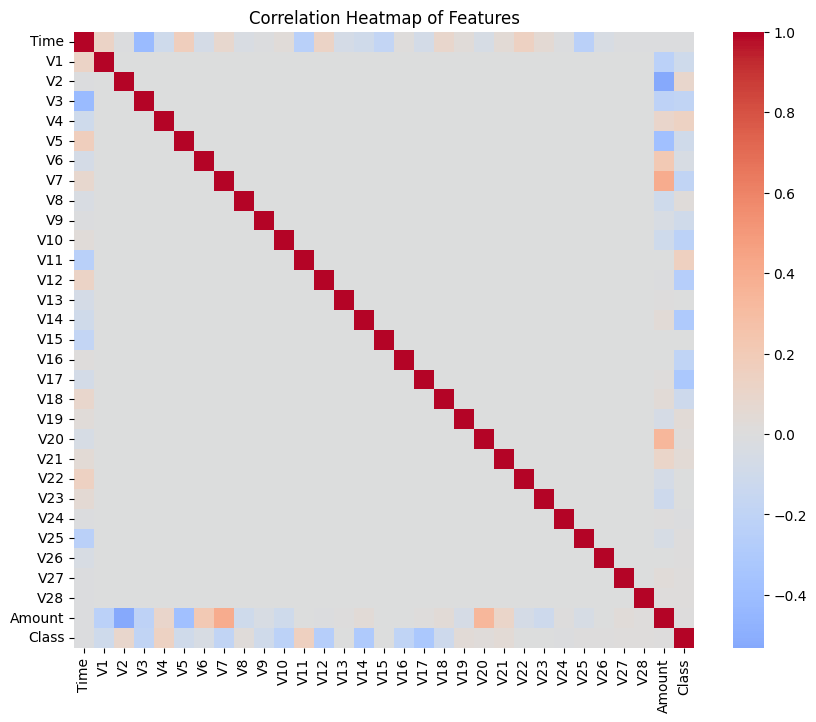

In [8]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Features")
plt.show()